In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data='dataset/iris.csv'
df=pd.read_csv(data)
df.columns =['sep-len', 'sep-wid', 'pet-len', 'pet-wid','class']
df=df.drop('class',axis='columns') # drop class column 
print(df)

     sep-len  sep-wid  pet-len  pet-wid
0        4.9      3.0      1.4      0.2
1        4.7      3.2      1.3      0.2
2        4.6      3.1      1.5      0.2
3        5.0      3.6      1.4      0.2
4        5.4      3.9      1.7      0.4
..       ...      ...      ...      ...
144      6.7      3.0      5.2      2.3
145      6.3      2.5      5.0      1.9
146      6.5      3.0      5.2      2.0
147      6.2      3.4      5.4      2.3
148      5.9      3.0      5.1      1.8

[149 rows x 4 columns]


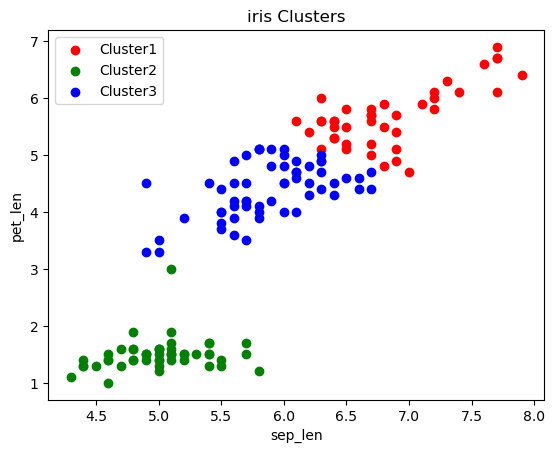

0.5867739291153844
File saved successfully 


In [7]:
# Between sep-len & pet-len 
x = df.iloc[:, [0,2]].values
k_model = KMeans(n_clusters=3, random_state=1)
y_KMeans = k_model.fit_predict(x)
plt.scatter(x[y_KMeans == 0, 0], x[y_KMeans == 0, 1], c='red', label='Cluster1')
plt.scatter(x[y_KMeans == 1, 0], x[y_KMeans == 1, 1], c='green', label='Cluster2')
plt.scatter(x[y_KMeans == 2, 0], x[y_KMeans == 2, 1], c='blue', label='Cluster3')
plt.title('iris Clusters')
plt.xlabel('sep_len')
plt.ylabel('pet_len')
plt.legend()
plt.show()

score = metrics.silhouette_score(x, y_KMeans)
print(score)


# save dataset
z = np.array([x[:, 0], x[:, 1], y_KMeans])
z = z.T
np.savetxt('dataset/clustered_iris.csv', z, delimiter=',',fmt='%f')
print('File saved successfully ')

In [8]:
data='dataset/clustered_iris.csv'
df=pd.read_csv(data)
df.columns =['sep-len','pet-len', 'cluster']
print(df)

     sep-len  pet-len  cluster
0        4.7      1.3      1.0
1        4.6      1.5      1.0
2        5.0      1.4      1.0
3        5.4      1.7      1.0
4        4.6      1.4      1.0
..       ...      ...      ...
143      6.7      5.2      0.0
144      6.3      5.0      2.0
145      6.5      5.2      0.0
146      6.2      5.4      0.0
147      5.9      5.1      2.0

[148 rows x 3 columns]
